# Simple moving avrage

In [22]:
import pandas as pd
import statsmodels.api as sm 
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('airline_passengers.csv')
df = df.drop(144,axis='index')


df.tail()


,Month,Thousands of Passengers
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [10]:
df = df.drop('Month',axis=1)
df.head()

,Thousands of Passengers
0,112.0
1,118.0
2,132.0
3,129.0
4,121.0


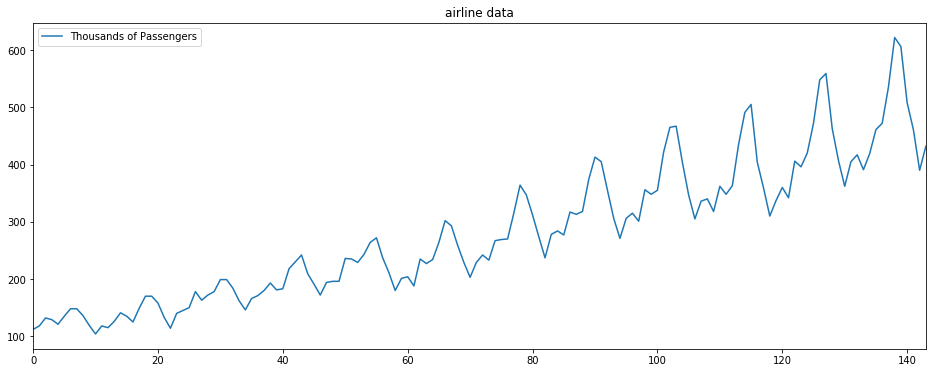

In [13]:
df.plot.line(title='airline data', figsize=(16,6))

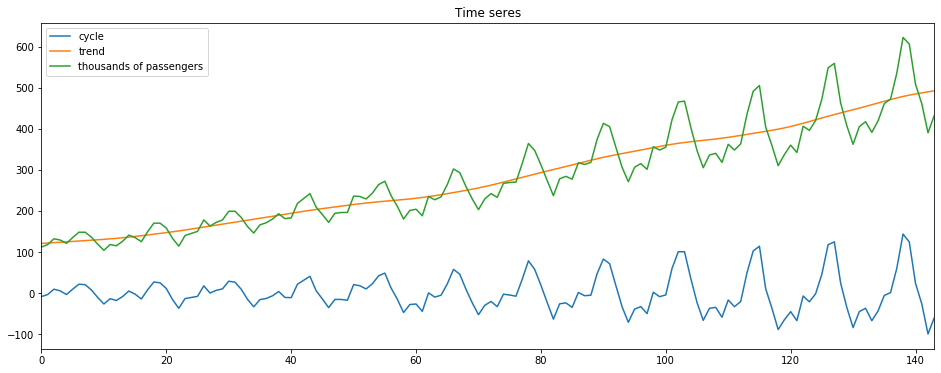

In [23]:
cycle,trend = sm.tsa.filters.hpfilter(df['Thousands of Passengers'])
cycle.plot(label='cycle', title='Time seres', figsize=(16,6))
trend.plot(label='trend')
df['Thousands of Passengers'].plot(label='thousands of passengers')
plt.legend()


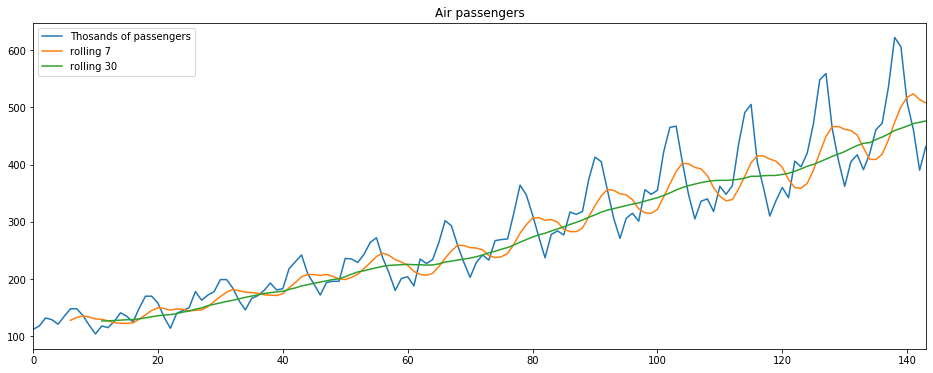

In [53]:
#df.plot(label='thousand of passengers', figsize=(16,6))

dfRolling= pd.concat([df['Thousands of Passengers'], df.rolling(7).mean(), df.rolling(12).mean()], axis=1 )
dfRolling.columns=['Thosands of passengers', 'rolling 7', 'rolling 30']
dfRolling.plot(title='Air passengers', figsize=(16,6))

# Exponential moving avrage 

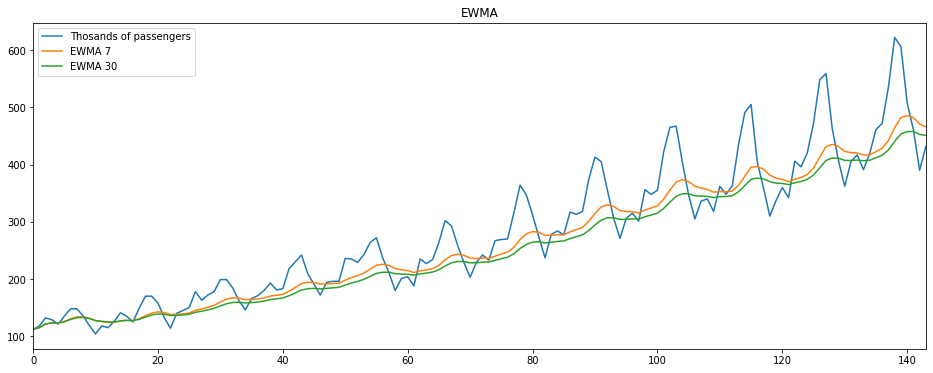

In [52]:
dfExpontial = pd.concat([df['Thousands of Passengers'], df.ewm(7).mean(), df.ewm(12).mean()], axis=1 )
dfExpontial.columns=['Thosands of passengers', 'EWMA 7', 'EWMA 30']
dfExpontial.plot(title ='EWMA', figsize=(16,6))